In [1]:
!pip install simpledbf

  Preparing metadata (setup.py) ... done
  Created wheel for simpledbf: filename=simpledbf-0.2.6-py3-none-any.whl size=13785 sha256=e7bd1b0bb463dfad33c8a2eae036898267fa0c12c4d29b35372c79ec72915f9c
  Stored in directory: /root/.cache/pip/wheels/e5/41/13/ebdef29165b9309ec4e235dbff19eca8b6759125b0924ad430
Successfully built simpledbf


In [2]:
import pandas as pd
from simpledbf import Dbf5
df = Dbf5('/kaggle/input/asia-pacific-storm-dataset/UNISYS_tracks_1956_2018Dec31.dbf').to_dataframe() 
df['year'] = df['ADV_DATE'].apply(func=lambda x: x if isinstance(x, float) else int(x.year))
df.shape

(227574, 12)

In [3]:
df.head()

,REGION,STORM_NO,NAME,ADVISORY,ADV_DATE,ADV_HOUR,SPEED,PRESSURE,TYPE,LAT,LONG_,year
0,S,0,1997-12-02,0,1997-12-03,18,25,0,D,-8.6,0.0,1997.0
1,I,0,1979-02-11,0,1979-02-11,12,-999,0,D,-16.4,0.0,1979.0
2,A,6,FIFI,0,1958-09-06,6,65,0,S,15.6,-55.7,1958.0
3,A,6,FRANCES,0,2004-09-02,0,120,939,H,22.2,-71.4,2004.0
4,A,3,UNNAMED,0,1948-09-03,0,40,0,S,53.8,-50.0,1948.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227574 entries, 0 to 227573
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   REGION    227574 non-null  object 
 1   STORM_NO  227574 non-null  int64  
 2   NAME      227574 non-null  object 
 3   ADVISORY  227574 non-null  int64  
 4   ADV_DATE  227506 non-null  object 
 5   ADV_HOUR  227574 non-null  int64  
 6   SPEED     227574 non-null  int64  
 7   PRESSURE  227574 non-null  int64  
 8   TYPE      227563 non-null  object 
 9   LAT       227574 non-null  float64
 10  LONG_     227574 non-null  float64
 11  year      227506 non-null  float64
dtypes: float64(3), int64(5), object(4)
memory usage: 20.8+ MB


<Axes: xlabel='LONG_', ylabel='LAT'>

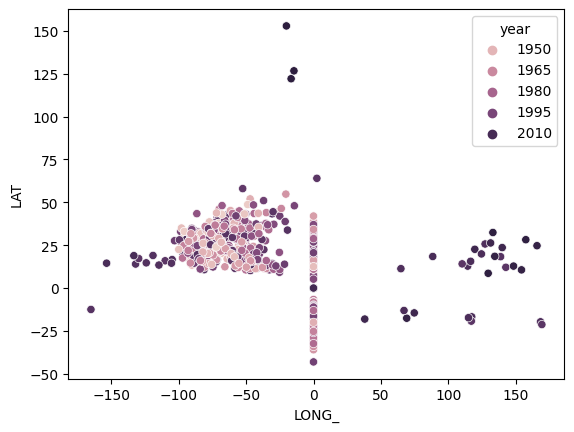

In [5]:
from seaborn import scatterplot
scatterplot(data=df.sample(n=1000), y='LAT', x='LONG_', hue='year')

That belt at the x=0 looks wrong so let's filter it out.

In [6]:
from plotly.express import scatter_geo
scatter_geo(data_frame = df[(df['LAT'] !=0) & (df['LONG_'] != 0) ].sample(n=10000), lat='LAT', lon='LONG_', color='year', hover_name='NAME')

<Axes: xlabel='REGION'>

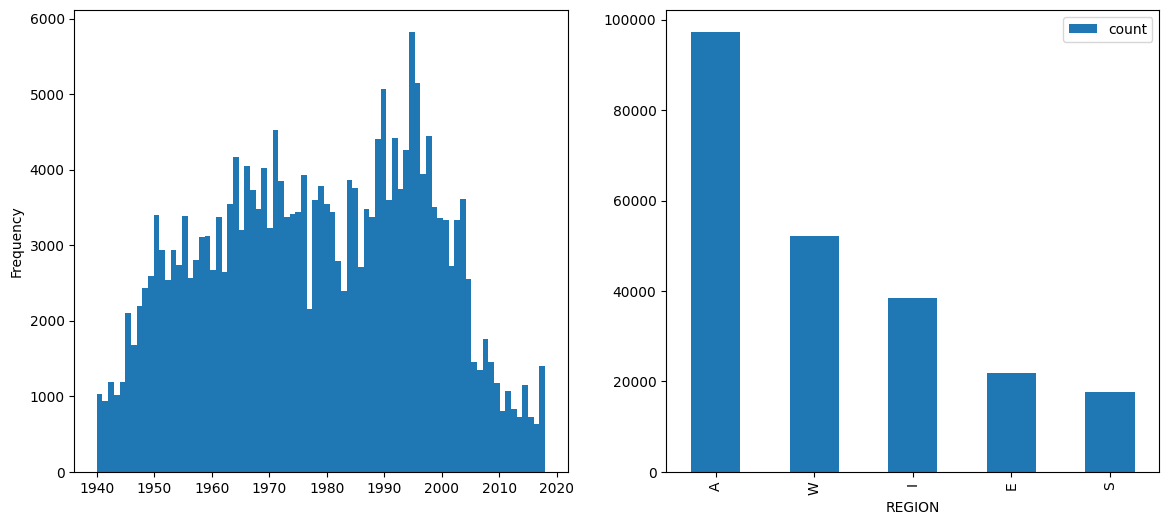

In [7]:
from matplotlib.pyplot import subplots
_, ax = subplots(figsize=(14, 6), ncols=2)
df['year'].plot.hist(ax=ax[0], bins=(1 + 2018 - 1940))
df['REGION'].value_counts().plot(ax=ax[1], kind='bar', legend=True)